In [1]:
from metis4py import part_mesh_nodal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(-0.5, 3.5)

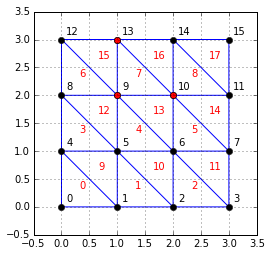

In [2]:
# Point coordinates.
xpoints = np.array( [0,1,2,3, 0,1,2,3, 0,1,2,3, 0,1,2,3] )
ypoints = np.array( [0,0,0,0, 1,1,1,1, 2,2,2,2, 3,3,3,3] )

# Triangle vertices.
triangles = np.array((
    (0,4,1),(1,5,2),(2,6,3),
    (4,8,5),(5,9,6),(6,10,7),
    (8,9,12),(9,10,13),(10,11,14),
    (1,4,5),(2,5,6),(3,6,7),
    (5,8,9),(6,9,10),(7,10,11),
    (9,12,13),(10,13,14),(11,14,15),
))

triangles_idx = np.array(
    [0,3,6,9,12,15,18,21,24,27,30,33,
     36,39,42,45,48,51,54,])

# Plot points.
plot(xpoints, ypoints, 'ko')

# Write point indices.
for i,(x,y) in enumerate(zip(xpoints,ypoints)):
    text(x+0.1, y+0.1, i)
    
# Plot triangles.
triplot(xpoints, ypoints, triangles)

# Write triangle indices.
for i,tri in enumerate(triangles):
    xtri = average(xpoints[tri])
    ytri = average(ypoints[tri])
    text(xtri, ytri, i, color='red')
    
# Plot for example vertices of triangle 7
itri = 7
i0, i1 = triangles_idx[itri:itri+2]
ivtx = triangles.flatten()[i0:i1]
plot(xpoints[ivtx], ypoints[ivtx], 'ro')
    
# Adjust plot.
grid()
axis('scaled')
xlim(-0.5, 3.5)
ylim(-0.5, 3.5)

In [3]:
nparts = 3
tripart,vtxpart = part_mesh_nodal(triangles_idx,
                                  triangles.flatten(),
                                  nparts)
print tripart
print vtxpart

[0 0 0 2 1 1 2 2 1 0 0 1 0 1 1 2 2 1]
[0 0 0 0 2 0 1 1 2 1 2 1 2 2 1 1]


(-0.5, 3.5)

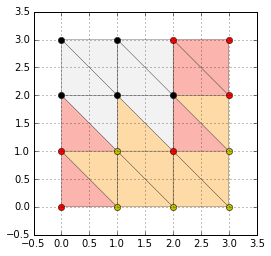

In [4]:
tripart = np.array([0,1,1,0,1,0,2,2,0,1,1,1,2,2,1,2,2,0])
vtxpart = np.array([0,1,1,1,0,1,0,1,2,2,2,0,2,2,0,0])

tripcolor(xpoints, ypoints, triangles, facecolors=tripart, 
          edgecolors='k', cmap=cm.Pastel1)
plot(xpoints[vtxpart==0], ypoints[vtxpart==0],'ro')
plot(xpoints[vtxpart==1], ypoints[vtxpart==1],'yo')
plot(xpoints[vtxpart==2], ypoints[vtxpart==2],'ko')

grid()
axis('scaled')
xlim(-0.5, 3.5)
ylim(-0.5, 3.5)